In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import tarfile
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# datafile_path = '/Users/anjalikarimpil/Google Drive/Dissertation/Data/Social LSTM/'
datafile_path = '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM'
datafiles = os.listdir(datafile_path)
datafiles = [os.path.join(datafile_path, i) for i in datafiles if i.startswith('al_position') and i.endswith('tar.gz')]
print(datafiles)


['/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-10.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-17.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-16.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-15.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-12.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-18.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-09.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-07.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-06.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-08.csv.tar.gz', '/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-19.csv.tar.gz', '/users/mscdsa2018/a

In [4]:
datafiles[0]

'/users/mscdsa2018/ask2/Projects/Datasets/Social LSTM/al_position2013-02-10.csv.tar.gz'

In [5]:
folders = []
tar = tarfile.open(datafiles[0], 'r:gz')
tar.extractall(datafiles[0].split('.', 1)[0])
tar.close()
folders.append(datafiles[0].split('.', 1)[0])

In [6]:
folders[0]
files = os.listdir(os.path.join(datafile_path, folders[0]))
files = [os.path.join(datafile_path, folders[0], i) for i in files]
# read first file in extracted folder
import pandas as pd
df=pd.read_csv(files[0], sep=';',header=None)


In [7]:
df['date'], df['time'] = df[0].str.split('T', 1).str
df[0] = pd.to_datetime(df[0], format="%Y-%m-%dT%H:%M:%S:%f")
df.columns = ['datetime', 'place', 'x_pos', 'y_pos', 'person_id', 'date', 'time']

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,x_pos,y_pos,person_id
count,4338515.00,4338515.00,4338515.00
mean,44941.35,19315.18,2417.36
std,22191.10,10748.39,1630.09
min,1870.00,0.00,1.00
25%,25956.00,12813.00,794.00
50%,44589.00,14443.00,2356.00
75%,62170.00,20090.00,3889.00
max,93785.00,49940.00,5288.00


In [9]:
df.sort_values(['person_id','datetime'], inplace=True, ascending=True)

df['time_lead'] = df.groupby(['person_id', 'date'])['datetime'].shift(-1)
df['target_x'] = df.groupby(['person_id', 'date'])['x_pos'].shift(-5)
df['target_y'] = df.groupby(['person_id', 'date'])['y_pos'].shift(-5)

In [10]:

threshold = pd.to_timedelta('00:20:00.00000')
df['fl'] = np.where(abs(df['time_lead'] - df['datetime']) > threshold, 1, 0)
df.head(5)
df['traj_id'] = df['fl'].cumsum()
df.head(5)


,datetime,place,x_pos,y_pos,person_id,date,time,time_lead,target_x,target_y,fl,traj_id
0,2013-02-10 07:00:00.026,PIW,74446,5951,1,2013-02-10,07:00:00:026,2013-02-10 07:00:00.126,74437.00,6186.00,0,0
1,2013-02-10 07:00:00.126,PIW,74441,6066,1,2013-02-10,07:00:00:126,2013-02-10 07:00:00.226,74449.00,6226.00,0,0
2,2013-02-10 07:00:00.226,PIW,74440,6105,1,2013-02-10,07:00:00:226,2013-02-10 07:00:00.326,74447.00,6265.00,0,0
3,2013-02-10 07:00:00.326,PIW,74440,6108,1,2013-02-10,07:00:00:326,2013-02-10 07:00:00.426,74431.00,6304.00,0,0
4,2013-02-10 07:00:00.426,PIW,74438,6145,1,2013-02-10,07:00:00:426,2013-02-10 07:00:00.526,74415.00,6382.00,0,0


In [11]:
df.describe()

,x_pos,y_pos,person_id,target_x,target_y,fl,traj_id
count,4338515.00,4338515.00,4338515.00,4312075.00,4312075.00,4338515.00,4338515.00
mean,44941.35,19315.18,2417.36,44951.84,19292.81,0.00,726.24
std,22191.10,10748.39,1630.09,22139.43,10734.89,0.01,219.82
min,1870.00,0.00,1.00,1870.00,0.00,0.00,0.00
25%,25956.00,12813.00,794.00,26025.00,12811.00,0.00,794.00
50%,44589.00,14443.00,2356.00,44604.00,14432.00,0.00,835.00
75%,62170.00,20090.00,3889.00,62147.00,19882.00,0.00,835.00
max,93785.00,49940.00,5288.00,93785.00,49939.00,1.00,835.00


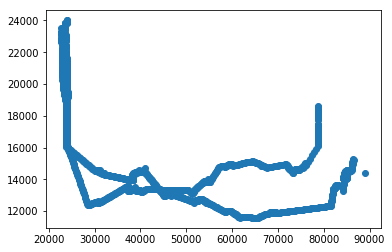

In [12]:
# index = 1
# df_1 = df.loc[df['traj_id'] == index]
# plt.scatter(df_1['x_pos'], df_1['y_pos'])
# plt.show()

In [13]:
np.ma.count(df['traj_id'].unique())

836

In [238]:
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Embedding
# from keras.layers import LSTM
# from keras.datasets import imdb
# import numpy as np

# max_features = 4 # 0,1,2,3 (total of 4)
# x = [
#     [[0],[1],[1],[0],[0],[0]],
#     [[0],[0],[0],[2],[2],[0]],
#     [[0],[0],[0],[0],[3],[3]],
#     [[0],[2],[2],[0],[0],[0]],
#     [[0],[0],[3],[3],[0],[0]],
#     [[0],[0],[0],[0],[1],[1]]
# ]
# x = np.array(x,dtype=np.float32)
# y = np.array([1,2,3,2,3,1],dtype=np.int32)

# # Convert y2 to dummy variables (one-hot encoding of y)
# y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
# y2[np.arange(y.shape[0]), y] = 1.0
# print(y2)

# print('Build model...')
# model = Sequential()
# model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, input_shape=(6, 1)))
# model.add(Dense(4, activation='sigmoid'))

# # try using different optimizers and different optimizer configs
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# print(x.shape, y.shape, y2.shape)
# # Work aayi?

[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]]
Build model...
(6, 6, 1) (6,) (6, 4)


In [239]:
# print('Train...')
# model.fit(x,y2,epochs=200)
# pred = model.predict(x)
# predict_classes = np.argmax(pred,axis=1)
# print("Predicted classes: {}",predict_classes)
# print("Expected classes: {}",predict_classes)

Train...
Epoch 1/200
6/6 [==============================] - 2s 259ms/step - loss: 0.6983 - acc: 0.5833
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6962 - acc: 0.5417
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6866 - acc: 0.7083
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6786 - acc: 0.7917
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6772 - acc: 0.7500
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6657 - acc: 0.7500
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6648 - acc: 0.7083
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6565 - acc: 0.7500
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6410 - acc: 0.7500
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6312 - acc: 0.7500
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 4ms/step - loss: 0.2331 - acc: 0.9167
Epoch 90/200
6/6 [==============================] - 0s 4ms/step - loss: 0.2999 - acc: 0.8750
Epoch 91/200
6/6 [==============================] - 0s 2ms/step - loss: 0.3636 - acc: 0.8333
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4844 - acc: 0.7083
Epoch 93/200
6/6 [==============================] - 0s 2ms/step - loss: 0.2850 - acc: 0.9167
Epoch 94/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5914 - acc: 0.7083
Epoch 95/200
6/6 [==============================] - 0s 3ms/step - loss: 0.3933 - acc: 0.8333
Epoch 96/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4001 - acc: 0.8333
Epoch 97/200
6/6 [==============================] - 0s 3ms/step - loss: 0.3950 - acc: 0.7917
Epoch 98/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4112 - acc: 0.8333
Epoch 99/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2476 - ac

Epoch 177/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1743 - acc: 0.9167
Epoch 178/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4155 - acc: 0.8333
Epoch 179/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1952 - acc: 0.9167
Epoch 180/200
6/6 [==============================] - 0s 3ms/step - loss: 0.3542 - acc: 0.8333
Epoch 181/200
6/6 [==============================] - 0s 2ms/step - loss: 0.2532 - acc: 0.8750
Epoch 182/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2254 - acc: 0.9167
Epoch 183/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2352 - acc: 0.8333
Epoch 184/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2521 - acc: 0.9167
Epoch 185/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1578 - acc: 1.0000
Epoch 186/200
6/6 [==============================] - 0s 2ms/step - loss: 0.1859 - acc: 0.9583
Epoch 187/200
6/6 [==============================] - 0s 2ms/

In [14]:

data = df[['traj_id','x_pos','y_pos']]
w = 5
for i in range(1, w + 1):
    data['x_'+str(i)] = data.groupby(['traj_id'])['x_pos'].shift(-i)
    data['y_'+str(i)] = data.groupby(['traj_id'])['x_pos'].shift(-i)
# Remove NAs 
data = data.dropna()

/users/mscdsa2018/ask2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/users/mscdsa2018/ask2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
data.head(5)

,traj_id,x_pos,y_pos,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5
0,0,74446,5951,74441.00,74441.00,74440.00,74440.00,74440.00,74440.00,74438.00,74438.00,74437.00,74437.00
1,0,74441,6066,74440.00,74440.00,74440.00,74440.00,74438.00,74438.00,74437.00,74437.00,74449.00,74449.00
2,0,74440,6105,74440.00,74440.00,74438.00,74438.00,74437.00,74437.00,74449.00,74449.00,74447.00,74447.00
3,0,74440,6108,74438.00,74438.00,74437.00,74437.00,74449.00,74449.00,74447.00,74447.00,74431.00,74431.00
4,0,74438,6145,74437.00,74437.00,74449.00,74449.00,74447.00,74447.00,74431.00,74431.00,74415.00,74415.00


In [16]:
from sklearn.model_selection import train_test_split
def dataset_generator(data):
    train = 0.8
    test = 0.2
#     dev = 0.1
    total_length = len(data)
    total_trajectories = np.ma.count(data['traj_id'].unique())
    train_ix = train * total_trajectories
    test_ix = test * total_trajectories
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 3:], data[['x_pos']], 
                                                        train_size = 0.8, test_size = 0.2, random_state = 1)
    return X_train, X_test, y_train, y_test
#     dev_ix = dev * total_trajectories


In [30]:
X_train, X_test, y_train, y_test = dataset_generator(data)


In [31]:
print(X_train.shape, X_test.shape, y_train.shape)
# X_train.reshape(shape = (-1, 10, 1 ))
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

(3467468, 10) (866867, 10) (3467468, 1)


In [32]:
X_train = X_train.reshape((-1, 2, 5) )
X_test = X_test.reshape((-1, 2, 5) )

In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3467468, 2, 5) (3467468, 1) (866867, 2, 5) (866867, 1)


In [59]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import numpy as np


print('Build model...')
model = Sequential()
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2, input_shape=(2, 5)))
model.add(Dense(1))

# try using different optimizers and different optimizer configs
model.compile(loss='mae',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(X_train,y_train,epochs=25, batch_size = 72, validation_data=(X_test, y_test))



Build model...
Train...
Train on 3467468 samples, validate on 866867 samples
Epoch 1/25
3467468/3467468 [==============================] - 101s 29us/step - loss: 44650.6053 - acc: 0.0000e+00 - val_loss: 44244.2398 - val_acc: 0.0000e+00
Epoch 2/25
3467468/3467468 [==============================] - 92s 27us/step - loss: 43850.3001 - acc: 0.0000e+00 - val_loss: 43294.1247 - val_acc: 0.0000e+00
Epoch 3/25
3467468/3467468 [==============================] - 88s 25us/step - loss: 42906.7998 - acc: 2.8839e-07 - val_loss: 42318.7790 - val_acc: 4.6143e-06
Epoch 4/25
3467468/3467468 [==============================] - 88s 25us/step - loss: 41946.6577 - acc: 2.8839e-06 - val_loss: 41410.7205 - val_acc: 5.7679e-06
Epoch 5/25
3467468/3467468 [==============================] - 89s 26us/step - loss: 41026.5441 - acc: 1.7304e-06 - val_loss: 40507.8071 - val_acc: 5.7679e-06
Epoch 6/25
3467468/3467468 [==============================] - 97s 28us/step - loss: 40135.2639 - acc: 4.0375e-06 - val_loss: 39608.7

In [56]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
None


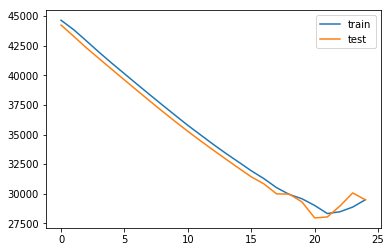

In [60]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

In [61]:
y_hat_train = model.predict(X_train)

In [63]:
y_hat_train.shape

(3467468, 1)